In [7]:
import sys
sys.path.insert(0, '../') 
import sphereGIS 
import datastructure
import numpy
import math
import shapely
import matplotlib.pyplot as plt
import geopandas

In [8]:
polygons = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))#[4:5]
polygons = polygons[polygons.name =='Brazil']

# 3:4 is trinidad
#polygons = geopandas.read_file('../data/caribbean.gpkg')[3:4]

#polygons = geopandas.read_file('../data/santa_barbara.gpkg')

#polygons['row'] = polygons.index

In [9]:
geom = polygons.iloc[0].geometry
polygon = datastructure.Polygon()
polygon.from_polygon(geom)
polygon.get_convex()

In [10]:
convex_nodes = polygon.convex_nodes.as_df()
convex_edges = polygon.convex_edges.as_df()

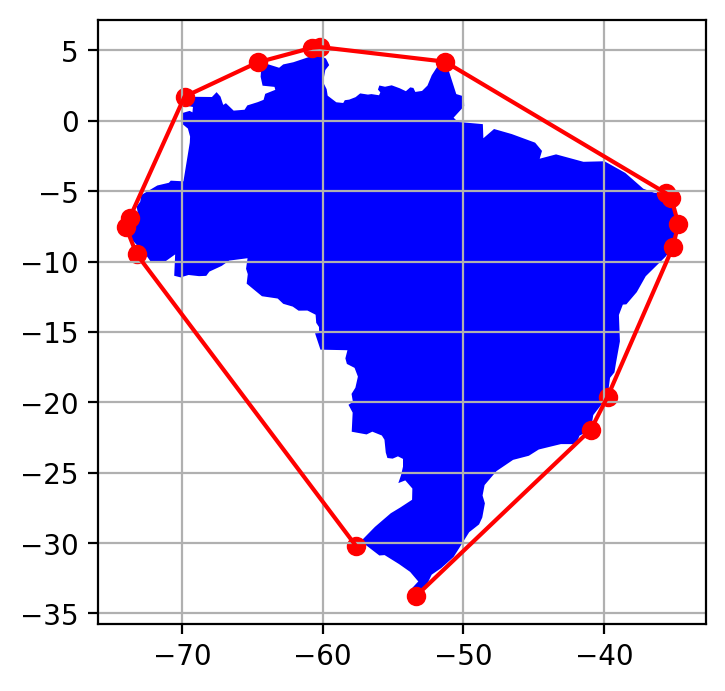

In [11]:
fig, ax = plt.subplots(dpi=200)
ax.grid(True)

polygons.plot(ax=ax, color='b')
convex_nodes.plot(ax=ax, color='r')
convex_edges.plot(ax=ax, color='r')

fig.savefig('hull.png')